## Analyse top skills

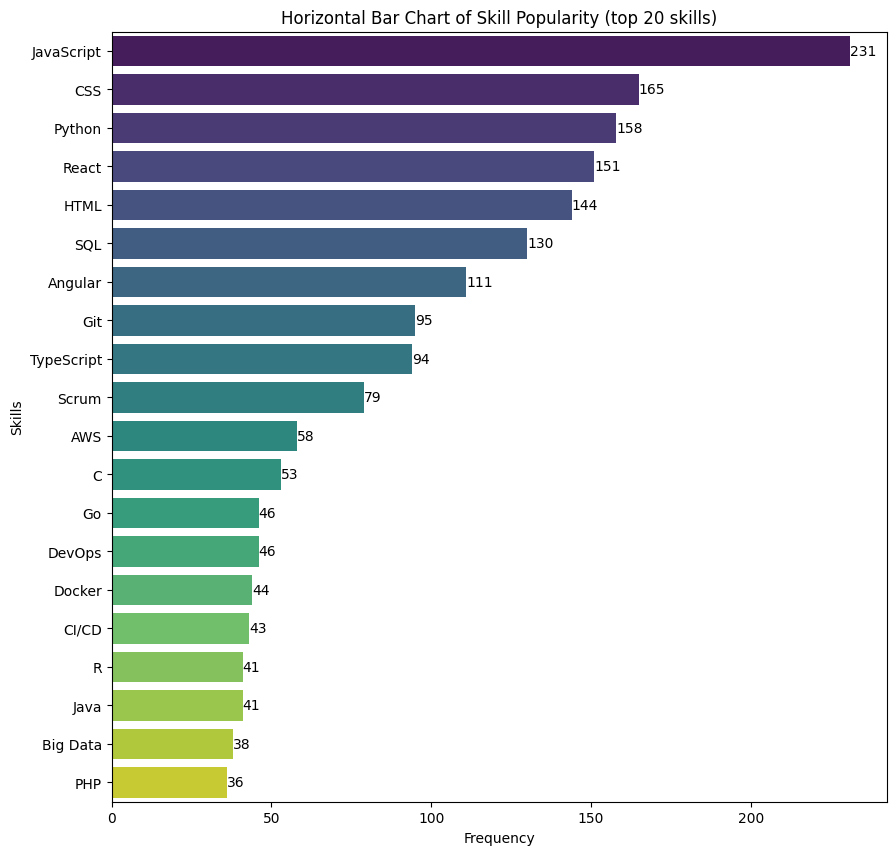

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# Load the pickle file
with open('processed_data.pkl', 'rb') as f:
    df = pickle.load(f)

# Split skills and expand the DataFrame
df['skills'] = df['skills'].str.split(',')
df_expanded = df.explode('skills')
df_expanded.head()

skill_counts = df_expanded['skills'].str.strip().value_counts()
sorted_skills = skill_counts.sort_values(ascending=False)

# Create a new DataFrame for all skills and their frequency
skills_df = pd.DataFrame(
    {'skill': sorted_skills.index, 'frequency': sorted_skills.values})
skills_df = skills_df[skills_df['skill'].notna() & (
    skills_df['skill'].str.strip() != '')]

# Filter the skills to display the top ones
max_skills = 20
top_skills_df = skills_df.head(max_skills)

# Create the horizontal bar chart
plt.figure(figsize=(10, max_skills/2))
sns.barplot(x='frequency', y='skill', data=top_skills_df, palette='viridis')
for index, value in enumerate(top_skills_df['frequency']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title(
    f'Horizontal Bar Chart of Skill Popularity (top {max_skills} skills)')

plt.show()

## Analyse top job titles

In [25]:
import plotly.express as px
import plotly.offline as pyo

# Create a DataFrame for the most common job titles and their frequencies
job_title_counts = df['title'].value_counts()
top_job_titles_df = pd.DataFrame(
    {'Job Title': job_title_counts.index, 'Frequency': job_title_counts.values})

# Sort the DataFrame in descending order by frequency
top_job_titles_df = top_job_titles_df.sort_values(
    by='Frequency', ascending=False)

# Select the top 10 most common job titles
top_job_titles_df = top_job_titles_df.head(10)

# Sort the DataFrame again to place the most popular job titles on top
top_job_titles_df = top_job_titles_df.sort_values(
    by='Frequency', ascending=True)

# Truncate the job titles
max_title_length = 40
top_job_titles_df['Truncated Job Title'] = top_job_titles_df['Job Title'].apply(
    lambda x: x[:max_title_length] if len(x) > max_title_length else x)

# Create the interactive horizontal bar chart
fig = px.bar(top_job_titles_df, x='Frequency', y='Truncated Job Title', orientation='h',
             labels={'Frequency': 'Frequency',
                     'Truncated Job Title': 'Job Title'},
             title='Top 10 Most Common Job Titles',
             color_discrete_sequence=px.colors.qualitative.Plotly)

pyo.plot(fig, filename='top_job_titles.html')
fig.show()

## Jobs by location

In [43]:
import plotly.graph_objects as go

# Group the data by 'city' and 'country' and count the number of jobs in each group
grouped_data = df.groupby(
    ['city', 'country']).size().reset_index(name='job_count')

# Filter out empty string cities
grouped_data = grouped_data[grouped_data['city'] != '']

# Sort the data by job_count in descending order
sorted_data = grouped_data.sort_values(by='job_count', ascending=False)

# Get the top 10 cities with the highest job counts
top_cities = sorted_data.head(10)

# Sort the DataFrame again to place the most popular job titles on top
top_cities = top_cities.sort_values(by='job_count', ascending=True)

country_name = top_cities.iloc[0]['country']

# Create the horizontal bar chart
fig = go.Figure()

# Add the horizontal bar trace
fig.add_trace(go.Bar(
    x=top_cities['job_count'],
    y=top_cities['city'],
    orientation='h',
    marker=dict(color='blue'),  # You can change the color of the bars here
    opacity=0.7,
))

# Set the layout for the chart
fig.update_layout(
    title=f'Job Distribution by City in {country_name} (Top 10)',
    xaxis_title='Number of Jobs',
    yaxis_title='City',
)

# Show the interactive horizontal bar chart
fig.show()


## Skills by location

In [63]:
import plotly.express as px

# Filter the skills in df_expanded to include only the top skills
df_expanded = df_expanded[df_expanded['skills'].isin(top_skills_df['skill'])]

# Group the data by 'city' and 'skills' and count the number of jobs for each combination
grouped_data = df_expanded.groupby(
    ['city', 'skills']).size().reset_index(name='job_count')

# Filter out empty string cities and skills
grouped_data = grouped_data[(grouped_data['city'] != '') & (
    grouped_data['skills'] != '')]

# Get the top ten cities with the highest job counts
top_cities = grouped_data.groupby(
    'city').sum().nlargest(10, 'job_count').reset_index()

# Filter the data to include only the top ten cities
grouped_data = grouped_data[grouped_data['city'].isin(top_cities['city'])]

# Create the scatter plot
fig = px.scatter(grouped_data, x='skills', y='city', size='job_count', color='job_count',
                 hover_name='skills', hover_data=['job_count'],
                 labels={'skills': 'Skills', 'city': 'City',
                         'job_count': 'Job Count'},
                 title='Top 10 Cities with Highest Job Counts for Each Skill',
                 category_orders={'city': sorted(top_cities['city'])})

# Show the interactive scatter plot
fig.show()
